# Calculating the Roadlength for the City of Cape Town 

In one of my previous posts I wrote about the [Metabolism of Cities](https://metabolismofcities.org/) project in which I got involved through a [Hack for Human Rights](http://datascentable.org/2019/06/04/hackday.html).

In this notebook (and associated blog post) I will explain the steps I took to get the road lengths in Cape Town to upload into the Metabolism of Cities database.

## Getting Started

I went back to the City of Cape Town's [Open Data Portal](https://web1.capetown.gov.za/web1/OpenDataPortal/) to see what data they have on offer. It turns out they have a dataset called [_"Road Centrelines"_](https://web1.capetown.gov.za/web1/OpenDataPortal/DatasetDetail?DatasetName=Road%20centrelines) (Road centrelines within Cape Town metro pole). I decided to investigate this.

The data from 2015 is available in [.kmz format](https://www.gearthblog.com/blog/archives/2005/09/google_earth_fi.html) along with a spreadsheet containing some attributes for centrelines.

### Resources and Tutorials

After some Googling, I find a [tutorial in QGIS that allows one to calculate road lengths form shape files](http://www.qgistutorials.com/en/docs/3/calculating_line_lengths.html) and a [tool for converting .kmz files](https://mygeodata.cloud/converter/kmz-to-shp) to [shape files](https://en.wikipedia.org/wiki/Shapefile). 

### Data Conversion

Converting the files with MyGeoData costs me USD 4.48 which I think is worthwhile as the tool is really easy to use and saves me a lot of time. You can convert up to 5MB for free, but my file is 12.3 MB.

### Software Installation

I have to install QGIS (I've never used it). Here is the link to information I used to get it going on Ubuntu 18.04:

- https://www.qgis.org/en/site/forusers/alldownloads.html
- https://trac.osgeo.org/ubuntugis/wiki/UbuntuGISRepository

As with many software installations, it takes some tinkering to get things going on my system...

### Calculating lengths and exporting data from QGIS

As mentioned, I followed the [tutorial by Ujaval Gandhi](http://www.qgistutorials.com/en/docs/3/calculating_line_lengths.html) for calculating the street lengths.

Here are some screenshots:

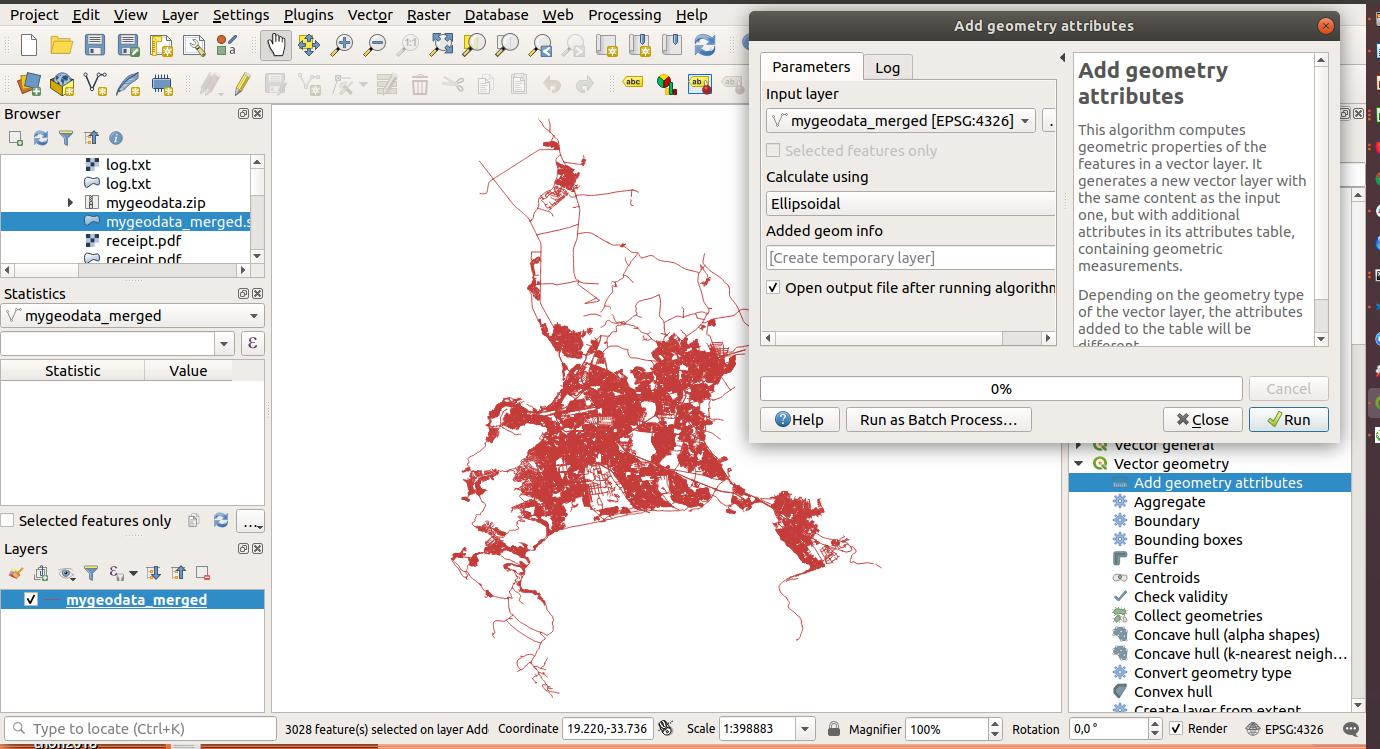

In [3]:
from IPython.display import Image 
Image(filename='images/qgis.png')

### Download Calculated Road Lengths from QGIS

It's not so obvious if you don't know, but thanks to [kind people at StackExchange](https://gis.stackexchange.com/questions/135801/how-to-export-attribute-table-to-excel-from-qgis) I learn how to download the attributes (lengths) as Excel/ODS file.

-> Right click on the newly calculated layer and select 'Export Features'

#### *Important note: Features (lengths) are calculated in meters (m)*

## Looking at the data in Python

In [3]:
# Import packages
import geopandas as gp
import matplotlib.pyplot as plt
import os 
import folium # helps to create certain types of leaflet maps
import pandas as pd

### Load the Shape File

In [4]:
gf = gp.read_file("/home/talarify/Downloads/mygeodata/mygeodata_merged.shp")
gf_crs = gf.to_crs(epsg = '4326')

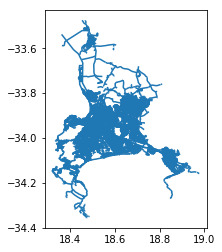

In [5]:
%matplotlib inline
gf.plot()

In [6]:
map_cptn = folium.Map(location=[-33.918861, 18.423300])
map_cptn

In [7]:
gf_crs.head()

,Name,descriptio,altitudeMo,SL_STR_NAM,STR_NAME,LU_STR_NAM,FID,SHAPE_ST_1,Descript_1,Field_1,geometry
0,6TH,None,absolute,9220400,6TH,2,0,154.800621,Avenue,6TH,LINESTRING (18.57097267263383 -33.913670356729...
1,16TH,None,absolute,9220401,16TH,13,1,108.666703,Street,16TH,LINESTRING (18.56925762591317 -33.914586189423...
2,SALDANHA,None,absolute,9220402,SALDANHA,13,2,43.299909,Street,SALDANHA,LINESTRING (18.55425843461471 -33.916347156165...
3,PAUL KRUGER,None,absolute,9220403,PAUL KRUGER,2,3,151.011937,Avenue,PAUL KRUGER,LINESTRING (18.55586854060038 -33.916479187530...
4,RAMONE,None,absolute,9220404,RAMONE,2,4,47.296444,Avenue,RAMONE,LINESTRING (18.56429400283584 -33.913453082263...


In [8]:
streets_gjson = folium.features.GeoJson(gf_crs, name = 'Roads')

In [16]:
streets_gjson.add_to(map_cptn) ## DO NOT TRY TO DISPLAY THIS MAP AS IT IS HUGE AND USES LARGE AMOUNTS OF CPU

map_cptn.save('images/map_cptn_with_roads.html') 

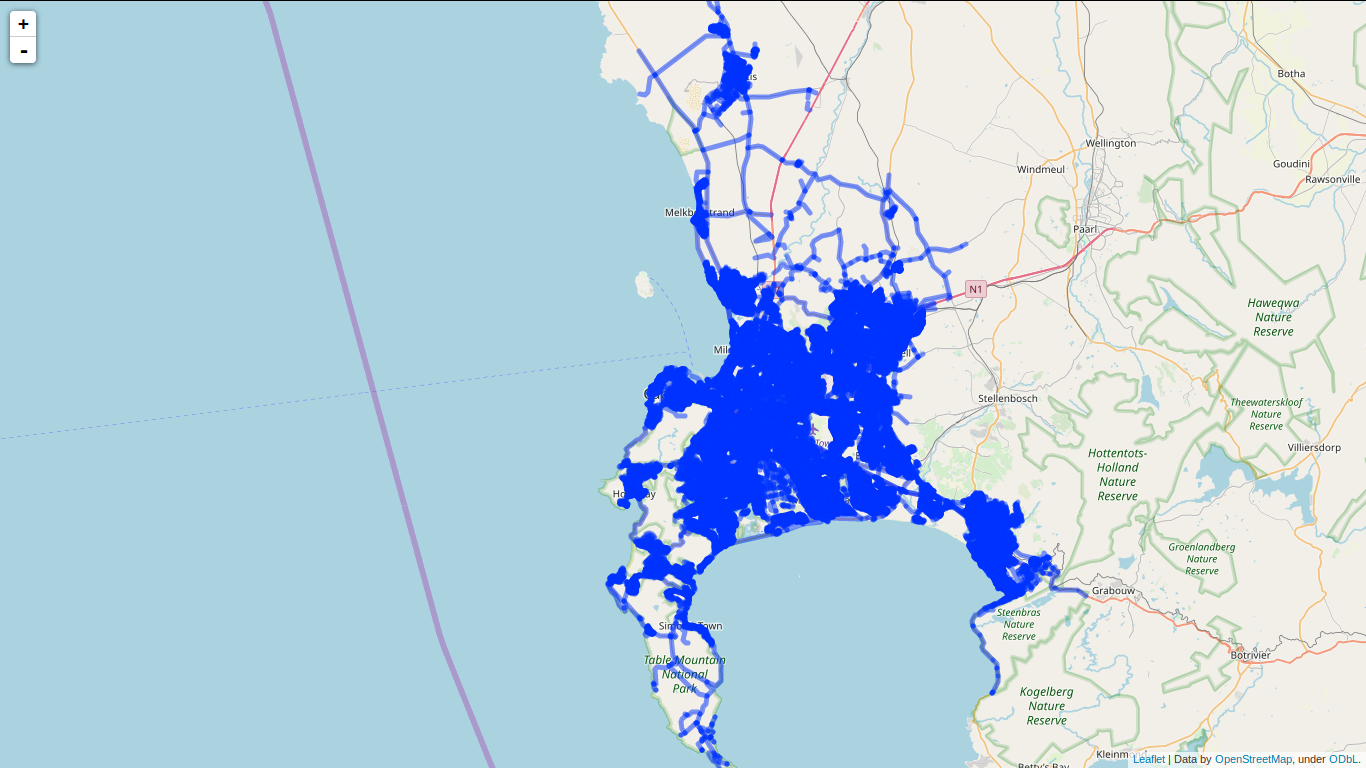

In [25]:
from IPython.display import Image 
Image(filename='images/map_cptn_with_shapefile_overlay.png')

In [26]:
road_lengths = pd.read_csv('analysis/calculated_road_lengths-qgis.csv')

In [27]:
road_lengths.head() # length in meter(m)

,Name,descriptio,altitudeMo,SL_STR_NAM,STR_NAME,LU_STR_NAM,FID,SHAPE_ST_1,Descript_1,Field_1,length
0,6TH,NaN,absolute,9220400,6TH,2,0,154.800621,Avenue,6TH,154.797604
1,16TH,NaN,absolute,9220401,16TH,13,1,108.666703,Street,16TH,108.664578
2,SALDANHA,NaN,absolute,9220402,SALDANHA,13,2,43.299909,Street,SALDANHA,43.299002
3,PAUL KRUGER,NaN,absolute,9220403,PAUL KRUGER,2,3,151.011937,Avenue,PAUL KRUGER,151.008789
4,RAMONE,NaN,absolute,9220404,RAMONE,2,4,47.296444,Avenue,RAMONE,47.295498


In [28]:
road_lengths['length'].describe()

count    99631.000000
mean       114.894975
std        200.339899
min          0.003888
25%         44.081046
50%         75.180779
75%        135.361546
max      18191.528533
Name: length, dtype: float64

### Checking the Numbers

According to the [City of Cape Town's official website](https://www.tct.gov.za/en/transport/transport-network/road-network/), the City's roads comprise more than 11,000km. Our calculations come to 11,447km so it may be accurate.


In [31]:
road_lengths['length'].sum() / 1000 ## Converting to kilometers

11447.101258039651